In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df= pd.read_csv('../data/aquacast_whitefield_3year.csv', parse_dates=['date'])

In [4]:
df.head(4)

,date,borewell_litres,bwssb_litres,tanker_litres,tanker_market_price,tanker_ref_price,occupancy_percent,rainfall_mm,special_event,bwssb_supply_index
0,2023-01-01,32882,29083,18673,0.156,0.14,92.6,3.0,0,1.0
1,2023-01-02,32873,28966,21800,0.153,0.14,96.0,2.6,0,1.0
2,2023-01-03,28827,26301,20872,0.153,0.14,87.3,2.5,0,1.0
3,2023-01-04,30956,26486,21616,0.153,0.14,90.8,1.1,0,1.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 1044 non-null   datetime64[ns]
 1   borewell_litres      1044 non-null   int64         
 2   bwssb_litres         1044 non-null   int64         
 3   tanker_litres        1044 non-null   int64         
 4   tanker_market_price  1044 non-null   float64       
 5   tanker_ref_price     1044 non-null   float64       
 6   occupancy_percent    1044 non-null   float64       
 7   rainfall_mm          1044 non-null   float64       
 8   special_event        1044 non-null   int64         
 9   bwssb_supply_index   1044 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(4)
memory usage: 81.7 KB


In [6]:
df.describe()

,date,borewell_litres,bwssb_litres,tanker_litres,tanker_market_price,tanker_ref_price,occupancy_percent,rainfall_mm,special_event,bwssb_supply_index
count,1044,1044.000000,1044.000000,1044.00000,1044.000000,1.044000e+03,1044.000000,1044.000000,1044.000000,1044.000000
mean,2024-06-05 12:00:00,32867.246169,29133.748084,21241.62069,0.154154,1.400000e-01,93.119636,10.412452,0.068966,0.989033
min,2023-01-01 00:00:00,27495.000000,24779.000000,14707.00000,0.149000,1.400000e-01,84.000000,0.000000,0.000000,0.900000
25%,2023-09-18 18:00:00,31705.500000,27960.500000,18943.75000,0.152000,1.400000e-01,91.100000,2.800000,0.000000,0.900000
50%,2024-06-05 12:00:00,32828.500000,28901.500000,20428.50000,0.153000,1.400000e-01,93.100000,7.400000,0.000000,1.000000
75%,2025-02-21 06:00:00,33993.000000,30189.500000,23717.75000,0.156000,1.400000e-01,95.100000,15.500000,0.000000,1.050000
max,2025-11-09 00:00:00,40006.000000,34338.000000,29216.00000,0.162000,1.400000e-01,100.000000,49.500000,1.000000,1.100000
std,NaN,1677.313156,1614.850490,3139.00910,0.002959,1.249600e-15,2.934241,9.586953,0.253517,0.059010


In [7]:
df.isnull().sum()

date                   0
borewell_litres        0
bwssb_litres           0
tanker_litres          0
tanker_market_price    0
tanker_ref_price       0
occupancy_percent      0
rainfall_mm            0
special_event          0
bwssb_supply_index     0
dtype: int64

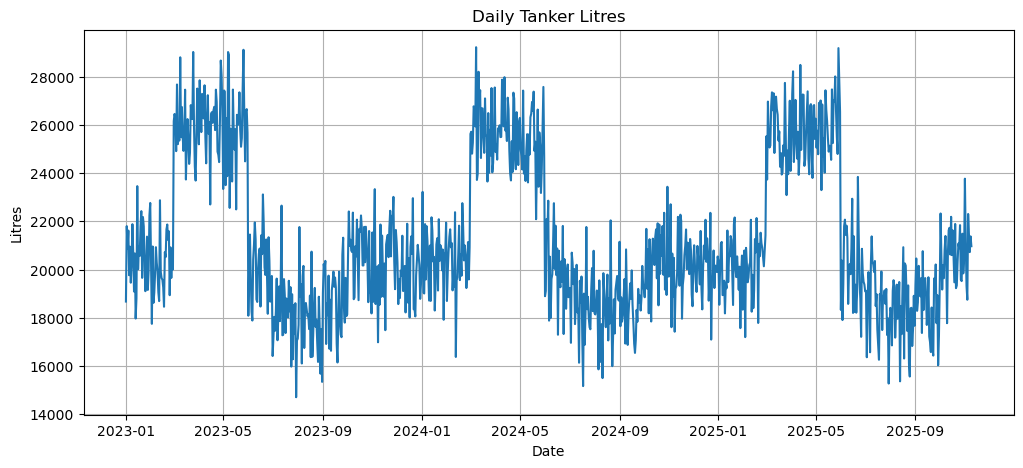

In [8]:
plt.figure(figsize=(12,5))
plt.plot(df["date"], df["tanker_litres"])
plt.title("Daily Tanker Litres")
plt.xlabel("Date")
plt.ylabel("Litres")
plt.grid()
plt.show()

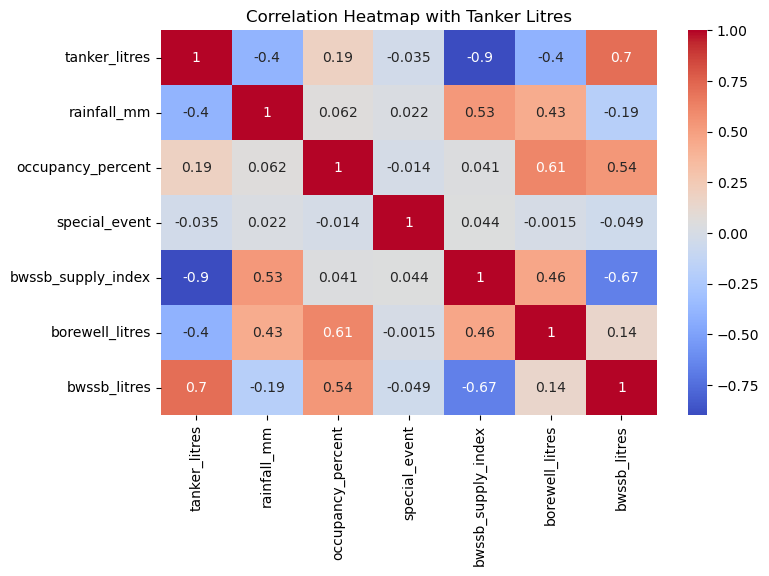

In [9]:
corr_cols = ["tanker_litres","rainfall_mm","occupancy_percent","special_event","bwssb_supply_index","borewell_litres","bwssb_litres"]
plt.figure(figsize=(8,5))
sns.heatmap(df[corr_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap with Tanker Litres")
plt.show()

In [10]:
df["date"] = pd.to_datetime(df["date"])

df["is_weekend"] = df["date"].dt.dayofweek.isin([5, 6]).astype(int)

In [11]:
### creating lag features for tanker_liters

df= df.sort_values('date').reset_index(drop=True)
for lag in [1,2,3,7,14,21]:
    df[f'tanker_lag_{lag}'] = df['tanker_litres'].shift(lag)

df[[c for c in df.columns if 'tanker_lag' in c]].head(10)

,tanker_lag_1,tanker_lag_2,tanker_lag_3,tanker_lag_7,tanker_lag_14,tanker_lag_21
0,NaN,NaN,NaN,NaN,NaN,NaN
1,18673.0,NaN,NaN,NaN,NaN,NaN
2,21800.0,18673.0,NaN,NaN,NaN,NaN
3,20872.0,21800.0,18673.0,NaN,NaN,NaN
4,21616.0,20872.0,21800.0,NaN,NaN,NaN
5,19764.0,21616.0,20872.0,NaN,NaN,NaN
6,20948.0,19764.0,21616.0,NaN,NaN,NaN
7,19455.0,20948.0,19764.0,18673.0,NaN,NaN
8,20289.0,19455.0,20948.0,21800.0,NaN,NaN
9,21880.0,20289.0,19455.0,20872.0,NaN,NaN


In [12]:
df_model = df.dropna().copy().reset_index(drop=True)

In [13]:
### Train, Validation, Test Split

n = len(df_model)
train_end = int(n * 0.7)
val_end = int(n * 0.85)

train_df = df_model.iloc[:train_end]
val_df = df_model.iloc[train_end:val_end]
test_df = df_model.iloc[val_end:]
len(train_df), len(val_df), len(test_df)

(716, 153, 154)

In [14]:
feature_cols = ["rainfall_mm","occupancy_percent","special_event","bwssb_supply_index","is_weekend",
                "tanker_lag_1","tanker_lag_2","tanker_lag_3","tanker_lag_7","tanker_lag_14","tanker_lag_21"]

X_train = train_df[feature_cols]
y_train = train_df["tanker_litres"]

X_val = val_df[feature_cols]
y_val = val_df["tanker_litres"]

X_test = test_df[feature_cols]
y_test = test_df["tanker_litres"]

X_train.shape, X_val.shape, X_test.shape

((716, 11), (153, 11), (154, 11))

In [15]:
## Baseline SARIMAX MODEL implementations:

from statsmodels.tsa.statespace.sarimax import SARIMAX
sar_train_model = SARIMAX(
    y_train,
    exog=X_train,
    order=(1,1,1),
    seasonal_order=(1,0,1,7),
    enforce_stationarity=False,
    enforce_invertibility=False).fit(disp=False)

sar_train_pred = sar_train_model.predict(
    start=train_df.index[0],
    end=train_df.index[-1],
    exog=X_train)

sar_val_pred =sar_train_model.get_prediction(
    start=val_df.index[0],
    end=val_df.index[-1],
    exog=X_val).predicted_mean
    

/opt/anaconda3/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [16]:
from sklearn.metrics import mean_absolute_error

mae_val = mean_absolute_error(y_val, sar_val_pred)
mae_val

988.8734386812201

In [17]:
train_residuals = y_train - sar_train_pred
train_residuals.head()

0    20068.223461
1     1301.361488
2      373.385455
3      -25.482697
4      846.259026
dtype: float64

In [18]:
from sklearn.ensemble import GradientBoostingRegressor

gbm = GradientBoostingRegressor(
    random_state=42
)
gbm.fit(X_train, train_residuals)

val_residual_pred = gbm.predict(X_val)

final_val_pred = sar_val_pred + val_residual_pred

hybrid_mae = mean_absolute_error(y_val, final_val_pred)
hybrid_mae

1004.0961662142095

In [19]:
residual_feature_cols = ["rainfall_mm","occupancy_percent","bwssb_supply_index","tanker_lag_1","tanker_lag_7","tanker_lag_14"]

In [20]:
from sklearn.ensemble import GradientBoostingRegressor
gbm = GradientBoostingRegressor(
    random_state=42,
    max_depth=2,
    learning_rate=0.05,
    n_estimators=200
)

gbm.fit(X_train[residual_feature_cols], train_residuals)
val_resid_pred = gbm.predict(X_val[residual_feature_cols])

final_val_pred = sar_val_pred + val_resid_pred

from sklearn.metrics import mean_absolute_error
hybrid_mae = mean_absolute_error(y_val, final_val_pred)
hybrid_mae

959.206111153979

In [21]:
val_df = df_model.iloc[train_end:val_end].copy()

In [22]:
### Anomaly detection:

val_df['anamoly_score'] = abs(y_val - final_val_pred) / y_val * 100

In [23]:
val_df.rename(columns={'anamoly_score': 'anomaly_score'}, inplace=True)


In [24]:
print(val_df.columns)

Index(['date', 'borewell_litres', 'bwssb_litres', 'tanker_litres',
       'tanker_market_price', 'tanker_ref_price', 'occupancy_percent',
       'rainfall_mm', 'special_event', 'bwssb_supply_index', 'is_weekend',
       'tanker_lag_1', 'tanker_lag_2', 'tanker_lag_3', 'tanker_lag_7',
       'tanker_lag_14', 'tanker_lag_21', 'anomaly_score'],
      dtype='object')


In [25]:
val_df["anomaly_score"].describe()

count    153.000000
mean       4.056831
std        3.377924
min        0.004755
25%        1.348392
50%        3.063369
75%        6.177514
max       13.930977
Name: anomaly_score, dtype: float64

In [26]:
threshold = np.percentile(val_df["anomaly_score"], 90)
threshold

np.float64(9.241091795524502)

In [27]:
val_df["leak_alert"] = (val_df["anomaly_score"] > threshold).astype(int)
val_df[["date","tanker_litres","anomaly_score","leak_alert"]].head(15)

,date,tanker_litres,anomaly_score,leak_alert
716,2025-01-07,18945,8.824338,0
717,2025-01-08,19537,4.355818,0
718,2025-01-09,18182,12.792547,1
719,2025-01-10,19450,0.842510,0
720,2025-01-11,19223,7.018403,0
721,2025-01-12,21618,4.619304,0
722,2025-01-13,19480,1.059364,0
723,2025-01-14,20551,9.739014,1
724,2025-01-15,20542,3.047759,0
725,2025-01-16,21387,2.249367,0


In [28]:
val_df["leak_alert"].sum()

np.int64(16)

In [29]:
def explain(row):
    if row["special_event"] == 1:
        return "Event driven spike"
    elif row["bwssb_supply_index"] < 0.95:
        return "BWSSB shortage spike"
    elif row["rainfall_mm"] > df["rainfall_mm"].median():
        return "Rain driven pattern shift"
    else:
        return "Potential leak / unexplained"

val_df["anomaly_reason"] = val_df.apply(explain, axis=1)
val_df[val_df["leak_alert"]==1][["date","tanker_litres","anomaly_score","anomaly_reason"]].head(10)

,date,tanker_litres,anomaly_score,anomaly_reason
718,2025-01-09,18182,12.792547,Potential leak / unexplained
723,2025-01-14,20551,9.739014,Potential leak / unexplained
743,2025-02-03,17199,12.206264,Potential leak / unexplained
751,2025-02-11,18253,13.930977,Potential leak / unexplained
769,2025-03-01,25521,11.419084,BWSSB shortage spike
771,2025-03-03,26962,9.730084,BWSSB shortage spike
811,2025-04-12,28482,10.299907,BWSSB shortage spike
834,2025-05-05,26908,9.252653,BWSSB shortage spike
836,2025-05-07,27008,9.742051,BWSSB shortage spike
838,2025-05-09,26843,10.093103,BWSSB shortage spike


In [30]:
df['tanker_litres'].median()

20428.5

In [30]:
def dynamic_price(
    forecast_litres,
    bwssb_supply_index,
    is_weekend,
    ref_price=0.14):
    """
    Returns predicted market price per litre for a day,
    using realistic Bangalore surge behavior
    with medium sensitivity
    """
    # Demand surge component
    median_demand = df['tanker_litres'].median()
    demand_ratio = forecast_litres / median_demand
    alpha=0.15
    demand_surge = alpha * (demand_ratio - 1)

    # Weekend premium
    beta = 0.06
    weekend_surge = beta if is_weekend == 1 else 0
    
    # BWSSB supply penalty 
    gamma = 0.06
    supply_penalty = gamma * (1 - bwssb_supply_index)

    # 4. Final price 
    final_price = ref_price * (1 + demand_surge + weekend_surge + supply_penalty)

    # Safety constraints
    final_price = max(final_price, ref_price)     # never below reference
    final_price = min(final_price, 0.25)          # cap at 0.25 Rs/L (≈ ₹3000 per 12KL)

    return round(final_price, 4)
    
    

In [31]:
dynamic_price(
    forecast_litres=25000,      # high demand
    bwssb_supply_index=0.85,    # supply shortage
    is_weekend=1                # weekend
)

0.1544

In [32]:
print(feature_cols)
print(df_model[feature_cols].dtypes)


['rainfall_mm', 'occupancy_percent', 'special_event', 'bwssb_supply_index', 'is_weekend', 'tanker_lag_1', 'tanker_lag_2', 'tanker_lag_3', 'tanker_lag_7', 'tanker_lag_14', 'tanker_lag_21']
rainfall_mm           float64
occupancy_percent     float64
special_event           int64
bwssb_supply_index    float64
is_weekend              int64
tanker_lag_1          float64
tanker_lag_2          float64
tanker_lag_3          float64
tanker_lag_7          float64
tanker_lag_14         float64
tanker_lag_21         float64
dtype: object


In [33]:
y_train_val = pd.concat([y_train, y_val])
X_train_val = pd.concat([X_train, X_val])

# Fit SARIMAX on full training window
sar_final = SARIMAX(
    y_train_val,
    exog=X_train_val,
    order=(1,1,1),
    seasonal_order=(1,0,1,7),
    enforce_stationarity=False,
    enforce_invertibility=False
).fit(disp=False)

sar_final

/opt/anaconda3/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [34]:
def rolling_forecast_7_days(df_model, sar_model, gbm_model, feature_cols, residual_feature_cols,
                            order=(1,1,1), seasonal_order=(1,0,1,7)):

    # take last rows for lag building
    hist = df_model.tail(30).copy().reset_index(drop=True)
    preds = []

    for step in range(7):

        # create lag features
        for lag in [1,2,3,7,14,21]:
            hist[f"tanker_lag_{lag}"] = hist["tanker_litres"].shift(lag)

        lag_cols = [f"tanker_lag_{x}" for x in [1,2,3,7,14,21]]
        hist[lag_cols] = hist[lag_cols].fillna(method="bfill").fillna(0)

        # latest row
        row = hist.iloc[-1]

        # ---------------------------
        # BUILD THE TWO EXOG MATRICES
        # ---------------------------

        # SARIMAX uses all 11 features
        X_next_sar = row[feature_cols].astype(float).values.reshape(1, -1)

        # GBM uses only the residual features (6)
        X_next_gbm = row[residual_feature_cols].astype(float).values.reshape(1, -1)

        # --------------------------------------
        # 1) REFIT SARIMAX ON UPDATED HISTORY
        # --------------------------------------
        endog = hist["tanker_litres"].astype(float)
        exog_sar = hist[feature_cols].astype(float)
        exog_sar = exog_sar.replace([np.inf, -np.inf], np.nan).fillna(0)

        sar_local = SARIMAX(
            endog=endog,
            exog=exog_sar,
            order=order,
            seasonal_order=seasonal_order,
            enforce_stationarity=False,
            enforce_invertibility=False
        ).fit(disp=False)

        # SARIMA prediction
        sar_pred = sar_local.forecast(steps=1, exog=X_next_sar).iloc[0]

        # ------------------------------------
        # 2) GBM RESIDUAL CORRECTION
        # ------------------------------------
        gbm_res = gbm_model.predict(X_next_gbm)[0]

        final_pred = sar_pred + gbm_res
        preds.append(final_pred)

        # append new row to history
        new_row = row.copy()
        new_row["tanker_litres"] = final_pred
        hist = pd.concat([hist, new_row.to_frame().T], ignore_index=True)

    return preds

In [98]:
forecast_7 = rolling_forecast_7_days(
    df_model=df_model,
    sar_model=sar_final,
    gbm_model=gbm,
    feature_cols=feature_cols,                  # 11 features
    residual_feature_cols=residual_feature_cols # 6 features
)

forecast_7

/var/folders/_y/c57b91jn5dj0c_z6rs9snng40000gn/T/ipykernel_1675/182547446.py:15: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  hist[lag_cols] = hist[lag_cols].fillna(method="bfill").fillna(0)
/opt/anaconda3/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
/var/folders/_y/c57b91jn5dj0c_z6rs9snng40000gn/T/ipykernel_1675/182547446.py:15: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  hist[lag_cols] = hist[lag_cols].fillna(method="bfill").fillna(0)
/

[np.float64(17829.30463216971),
 np.float64(19748.005032687524),
 np.float64(20561.983576458457),
 np.float64(21616.929366002183),
 np.float64(20089.092130346464),
 np.float64(21481.986593716978),
 np.float64(19467.041608809355)]

In [35]:
import pandas as pd, numpy as np, math
from datetime import datetime, timedelta
# replace with path to your 3-year CSV
DATA_PATH = "../data/aquacast_whitefield_3year.csv"
df = pd.read_csv(DATA_PATH, parse_dates=["date"])

#  7-day liters (Q30)
forecast_7 = [
    17829.30463216971,
    19748.005032687524,
    20561.983576458457,
    21616.929366002183,
    20089.092130346464,
    21481.986593716978,
    19467.041608809355
]

# dates: next 7 days after dataset end (2025-11-10 .. 2025-11-16)
start = datetime(2025,11,10)
dates = [start + timedelta(days=i) for i in range(7)]

# supply index = last-week median (Option 1)
bwssb_median = float(df.tail(7)["bwssb_supply_index"].median())

# parameters
ref_price = 0.14
alpha, beta, gamma = 0.15, 0.06, 0.06
median_demand = 20428.5   # use df["tanker_litres"].median() if you prefer
tanker_capacity = 12000.0

def dynamic_price(forecast_litres, bwssb_supply_index, is_weekend_flag, ref_price=0.14):
    demand_ratio = forecast_litres / median_demand if median_demand>0 else 1.0
    demand_surge = alpha * (demand_ratio - 1)
    weekend_surge = beta if is_weekend_flag==1 else 0.0
    supply_penalty = gamma * (1 - bwssb_supply_index)
    price = ref_price * (1 + demand_surge + weekend_surge + supply_penalty)
    price = max(price, ref_price)
    price = min(price, 0.25)
    return round(price, 4)

rows = []
for dt, litres in zip(dates, forecast_7):
    weekend_flag = 1 if dt.weekday() >=5 else 0
    price = dynamic_price(litres, bwssb_median, weekend_flag, ref_price=ref_price)
    tankers = math.ceil(litres / tanker_capacity)
    market_cost = price * litres
    ref_cost = ref_price * litres
    rows.append({
        "date": dt.date(),
        "forecast_litres": round(litres,1),
        "tankers_needed": tankers,
        "market_price_per_l": price,
        "market_cost_rs": round(market_cost,2),
        "prebook_cost_rs": round(ref_cost,2),
        "savings_rs": round(market_cost - ref_cost,2),
        "weekend": weekend_flag,
        "bwssb_supply_index_used": bwssb_median
    })
out = pd.DataFrame(rows)
out.to_csv("../data/aquacast_7day_cost_plan_2025-11-10_to_2025-11-16.csv", index=False)
print(out)
print("Totals -> market:", out['market_cost_rs'].sum(), "ref:", out['prebook_cost_rs'].sum(), "savings:", round(out['market_cost_rs'].sum()-out['prebook_cost_rs'].sum(),2))

         date  forecast_litres  tankers_needed  market_price_per_l  \
0  2025-11-10          17829.3               2              0.1400   
1  2025-11-11          19748.0               2              0.1400   
2  2025-11-12          20562.0               2              0.1401   
3  2025-11-13          21616.9               2              0.1412   
4  2025-11-14          20089.1               2              0.1400   
5  2025-11-15          21482.0               2              0.1495   
6  2025-11-16          19467.0               2              0.1474   

   market_cost_rs  prebook_cost_rs  savings_rs  weekend  \
0         2496.10          2496.10        0.00        0   
1         2764.72          2764.72        0.00        0   
2         2880.73          2878.68        2.06        0   
3         3052.31          3026.37       25.94        0   
4         2812.47          2812.47        0.00        0   
5         3211.56          3007.48      204.08        1   
6         2869.44         

In [101]:
import math

# out is the 7-day cost DataFrame  created earlier

df7 = out.copy()  # laoding

# compute savings per tanker
df7["savings_per_tanker"] = (df7["savings_rs"] / df7["tankers_needed"]).round(2)

# recommendation rules
THRESHOLD_PER_TANKER = 50  # you can change this
df7["recommend_prebook"] = (
    (df7["savings_per_tanker"] >= THRESHOLD_PER_TANKER) |
    ((df7["savings_rs"] > 0) & (df7["weekend"] == 1))
)

# priority flag
def priority(row):
    if row["savings_per_tanker"] >= THRESHOLD_PER_TANKER:
        return "High"
    if (row["savings_rs"] > 0) and (row["weekend"]==1):
        return "Medium"
    return "Low"

df7["priority"] = df7.apply(priority, axis=1)

print(df7[["date","forecast_litres","tankers_needed","market_price_per_l","savings_rs","savings_per_tanker","weekend","recommend_prebook","priority"]])

         date  forecast_litres  tankers_needed  market_price_per_l  \
0  2025-11-10          17829.3               2              0.1400   
1  2025-11-11          19748.0               2              0.1400   
2  2025-11-12          20562.0               2              0.1401   
3  2025-11-13          21616.9               2              0.1412   
4  2025-11-14          20089.1               2              0.1400   
5  2025-11-15          21482.0               2              0.1495   
6  2025-11-16          19467.0               2              0.1474   

   savings_rs  savings_per_tanker  weekend  recommend_prebook priority  
0        0.00                0.00        0              False      Low  
1        0.00                0.00        0              False      Low  
2        2.06                1.03        0              False      Low  
3       25.94               12.97        0              False      Low  
4        0.00                0.00        0              False      Low  
5

In [36]:
import numpy as np

# demand percentiles
p80 = df["tanker_litres"].quantile(0.80)
p90 = df["tanker_litres"].quantile(0.90)
median_demand = df["tanker_litres"].median()

def classify_shortage_risk(row):
    risk_score = 0
    reasons = []

    # High demand indicators
    if row["forecast_litres"] > p90:
        risk_score += 3
        reasons.append("Demand above 90th percentile")
    elif row["forecast_litres"] > p80:
        risk_score += 2
        reasons.append("Demand above 80th percentile")

    # BWSSB supply index
    if row["bwssb_supply_index_used"] < 0.95:
        risk_score += 3
        reasons.append("Low BWSSB supply")
    elif row["bwssb_supply_index_used"] < 1.0:
        risk_score += 1
        reasons.append("BWSSB slightly low")

    # Weekend + demand spike
    if (row["weekend"] == 1) and (row["forecast_litres"] > median_demand):
        risk_score += 2
        reasons.append("Weekend surge")

    # Price surge
    ref_price = 0.14
    surge_pct = (row["market_price_per_l"] / ref_price) - 1
    if surge_pct > 0.07:
        risk_score += 2
        reasons.append("High tanker market surge")
    elif surge_pct > 0.03:
        risk_score += 1
        reasons.append("Moderate tanker surge")

    # Anomalies (if available)
    # Only add if you have anomaly scores merged
    # e.g., row["anomaly_score"]
    # risk_score += ...
    
    # Classify
    if risk_score >= 5:
        return "High", "; ".join(reasons)
    elif risk_score >= 3:
        return "Medium", "; ".join(reasons)
    else:
        return "Low", "; ".join(reasons)

# Apply
risk_levels = out.apply(classify_shortage_risk, axis=1)
out["shortage_risk"] = risk_levels.apply(lambda x: x[0])
out["risk_reason"] = risk_levels.apply(lambda x: x[1])

out

,date,forecast_litres,tankers_needed,market_price_per_l,market_cost_rs,prebook_cost_rs,savings_rs,weekend,bwssb_supply_index_used,shortage_risk,risk_reason
0,2025-11-10,17829.3,2,0.1400,2496.10,2496.10,0.00,0,1.0,Low,
1,2025-11-11,19748.0,2,0.1400,2764.72,2764.72,0.00,0,1.0,Low,
2,2025-11-12,20562.0,2,0.1401,2880.73,2878.68,2.06,0,1.0,Low,
3,2025-11-13,21616.9,2,0.1412,3052.31,3026.37,25.94,0,1.0,Low,
4,2025-11-14,20089.1,2,0.1400,2812.47,2812.47,0.00,0,1.0,Low,
5,2025-11-15,21482.0,2,0.1495,3211.56,3007.48,204.08,1,1.0,Medium,Weekend surge; Moderate tanker surge
6,2025-11-16,19467.0,2,0.1474,2869.44,2725.39,144.06,1,1.0,Low,Moderate tanker surge


In [105]:
import numpy as np

rolling_mean = df["tanker_litres"].rolling(7).mean().iloc[-1]
rolling_std = df["tanker_litres"].rolling(7).std().iloc[-1]

def classify_leak(row):
    score = 0
    reasons = []

    # Deviation from rolling mean
    deviation = (row["forecast_litres"] - rolling_mean) / rolling_mean

    # Anomaly score if you have anomaly detection merged
    # If not present, set anomaly_score = 0
    anomaly_score = row.get("anomaly_score", 0)

    # High-severity leak rules
    if anomaly_score > 10:
        score += 3
        reasons.append("High anomaly score")
    if deviation > 0.30:
        score += 3
        reasons.append("Consumption +30% above rolling mean")

    # Medium severity
    if 0.10 < deviation <= 0.30:
        score += 1
        reasons.append("Consumption moderately high (+10-30%)")
    if 5 < anomaly_score <= 10:
        score += 1
        reasons.append("Medium anomaly score")

    # Classification
    if score >= 3:
        return "High", "; ".join(reasons)
    elif score >= 1:
        return "Medium", "; ".join(reasons)
    else:
        return "Low", "Normal usage"

# Apply leak detection
leak_levels = out.apply(classify_leak, axis=1)
out["leak_risk"] = leak_levels.apply(lambda x: x[0])
out["leak_reason"] = leak_levels.apply(lambda x: x[1])

out

,date,forecast_litres,tankers_needed,market_price_per_l,market_cost_rs,prebook_cost_rs,savings_rs,weekend,bwssb_supply_index_used,shortage_risk,risk_reason,leak_risk,leak_reason
0,2025-11-10,17829.3,2,0.1400,2496.10,2496.10,0.00,0,1.0,Low,,Low,Normal usage
1,2025-11-11,19748.0,2,0.1400,2764.72,2764.72,0.00,0,1.0,Low,,Low,Normal usage
2,2025-11-12,20562.0,2,0.1401,2880.73,2878.68,2.06,0,1.0,Low,,Low,Normal usage
3,2025-11-13,21616.9,2,0.1412,3052.31,3026.37,25.94,0,1.0,Low,,Low,Normal usage
4,2025-11-14,20089.1,2,0.1400,2812.47,2812.47,0.00,0,1.0,Low,,Low,Normal usage
5,2025-11-15,21482.0,2,0.1495,3211.56,3007.48,204.08,1,1.0,Medium,Weekend surge; Moderate tanker surge,Low,Normal usage
6,2025-11-16,19467.0,2,0.1474,2869.44,2725.39,144.06,1,1.0,Low,Moderate tanker surge,Low,Normal usage


In [37]:
import pandas as pd, numpy as np, math, os
from pathlib import Path
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split


DATA_PATH = "../data/aquacast_whitefield_3year.csv"
OUT_CSV = "../data/aquacast_30day_budget_projection.csv"

df = pd.read_csv(DATA_PATH, parse_dates=["date"]).sort_values("date").reset_index(drop=True)

df["is_weekend"] = (df["date"].dt.weekday >= 5).astype(int)


#  Creating Lag Features
for lag in [1,2,3,7,14,21]:
    df[f"tanker_lag_{lag}"] = df["tanker_litres"].shift(lag)

df = df.dropna().reset_index(drop=True)

# Defining Feature Columns

feature_cols = [
    "borewell_litres", "bwssb_litres", "rainfall_mm",
    "occupancy_percent", "special_event", "bwssb_supply_index",
    "is_weekend",
    "tanker_lag_1", "tanker_lag_2", "tanker_lag_3",
    "tanker_lag_7", "tanker_lag_14", "tanker_lag_21"
]

residual_feature_cols = [
    "borewell_litres", "bwssb_litres", "rainfall_mm",
    "occupancy_percent", "special_event", "bwssb_supply_index",
    "is_weekend"
]

# Train/Test Split

X = df[feature_cols]
y = df["tanker_litres"]

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.15, shuffle=False
)

# Train SARIMAX Final Model
sar_final = SARIMAX(
    y_train,
    exog=X_train,
    order=(1,1,1),
    seasonal_order=(1,0,1,7),
    enforce_stationarity=False,
    enforce_invertibility=False
).fit(disp=False)

# Residuals for GBM

sar_pred_train = sar_final.predict(start=y_train.index[0], end=y_train.index[-1], exog=X_train)
residuals_train = y_train - sar_pred_train

gbm = GradientBoostingRegressor(
    n_estimators=300, learning_rate=0.04, max_depth=4, random_state=42
)
gbm.fit(X_train[residual_feature_cols], residuals_train)

print("Hybrid model retrained successfully.")

# Rolling 30-Day Forecast Function

from statsmodels.tsa.statespace.sarimax import SARIMAX

def rolling_forecast_n_days(df_model, sar_model, gbm_model, feature_cols, residual_feature_cols, n_steps=30):
    hist = df_model.copy().tail(40).reset_index(drop=True)
    preds, dates = [], []

    for step in range(n_steps):
        # rebuild lags
        for lag in [1,2,3,7,14,21]:
            hist[f"tanker_lag_{lag}"] = hist["tanker_litres"].shift(lag)
        lag_cols = [f"tanker_lag_{x}" for x in [1,2,3,7,14,21]]
        hist[lag_cols] = hist[lag_cols].bfill().fillna(0)

        row = hist.iloc[-1].copy()

        # exog rows
        X_sar = row[feature_cols].astype(float).values.reshape(1,-1)
        X_gbm = row[residual_feature_cols].astype(float).values.reshape(1,-1)

        # local SARIMAX
        endog = hist["tanker_litres"].astype(float)
        exog_sar = hist[feature_cols].astype(float).fillna(0)

        sar_local = SARIMAX(
            endog=endog,
            exog=exog_sar,
            order=(1,1,1),
            seasonal_order=(1,0,1,7),
            enforce_stationarity=False,
            enforce_invertibility=False
        ).fit(disp=False)

        sar_pred = float(sar_local.forecast(steps=1, exog=X_sar).iloc[0])
        gbm_res = float(gbm_model.predict(X_gbm)[0])
        final_pred = sar_pred + gbm_res

        # update for next day
        next_date = pd.to_datetime(row["date"]) + pd.Timedelta(days=1)

        new_row = row.copy()
        new_row["tanker_litres"] = final_pred
        new_row["date"] = next_date
        new_row["is_weekend"] = 1 if next_date.weekday() >= 5 else 0

        # exogenous proxies
        new_row["rainfall_mm"] = df.tail(7)["rainfall_mm"].median()
        new_row["bwssb_supply_index"] = df.tail(7)["bwssb_supply_index"].median()
        new_row["occupancy_percent"] = df["occupancy_percent"].iloc[-1]
        new_row["special_event"] = 0

        hist = pd.concat([hist, new_row.to_frame().T], ignore_index=True)

        preds.append(final_pred)
        dates.append(next_date)

    return preds, dates

# Running 30-Day Forecast
forecast_30, forecast_dates = rolling_forecast_n_days(
    df, sar_final, gbm, feature_cols, residual_feature_cols, n_steps=30
)

print("30-day forecast generated.")

# Monthly Budget Projection

ref_price = 0.14
alpha, beta, gamma = 0.15, 0.06, 0.06
tanker_capacity = 12000
median_demand = df["tanker_litres"].median()
bwssb_median = df.tail(7)["bwssb_supply_index"].median()

def dynamic_price(f_litres, is_weekend, bwssb_index):
    demand_ratio = f_litres / median_demand
    demand_surge = alpha * (demand_ratio - 1)
    weekend_surge = beta if is_weekend else 0
    supply_penalty = gamma * (1 - bwssb_index)
    return float(round(min(0.25, max(ref_price, ref_price*(1+demand_surge+weekend_surge+supply_penalty))),4))

rows = []
for dt, litres in zip(forecast_dates, forecast_30):
    weekend = 1 if dt.weekday()>=5 else 0
    price = dynamic_price(litres, weekend, bwssb_median)
    tankers = math.ceil(litres / tanker_capacity)

    rows.append({
        "date": dt.date(),
        "forecast_litres": round(litres,1),
        "tankers_needed": tankers,
        "market_price_per_l": price,
        "market_cost_rs": round(price*litres,2),
        "prebook_cost_rs": round(ref_price*litres,2),
        "savings_rs": round(price*litres - ref_price*litres,2),
        "weekend": weekend
    })

df_30 = pd.DataFrame(rows)
df_30.to_csv(OUT_CSV, index=False)

print("CSV saved:", OUT_CSV)
print(df_30.head(10))

summary = {
    "forecast_30_total_market_rs": round(df_30["market_cost_rs"].sum(),2),
    "forecast_30_total_ref_rs": round(df_30["prebook_cost_rs"].sum(),2),
    "forecast_30_total_savings_rs": round(df_30["savings_rs"].sum(),2)
}

print("\nSUMMARY:\n", summary)

Hybrid model retrained successfully.


/opt/anaconda3/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
/var/folders/_y/c57b91jn5dj0c_z6rs9snng40000gn/T/ipykernel_4084/3136417032.py:98: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  hist[lag_cols] = hist[lag_cols].bfill().fillna(0)
/opt/anaconda3/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn

30-day forecast generated.
CSV saved: ../data/aquacast_30day_budget_projection.csv
         date  forecast_litres  tankers_needed  market_price_per_l  \
0  2025-11-10          20835.8               2              0.1404   
1  2025-11-11          20820.4               2              0.1404   
2  2025-11-12          20735.9               2              0.1403   
3  2025-11-13          20688.6               2              0.1403   
4  2025-11-14          20595.9               2              0.1402   
5  2025-11-15          20492.8               2              0.1485   
6  2025-11-16          20335.4               2              0.1483   
7  2025-11-17          20001.1               2              0.1400   
8  2025-11-18          19761.7               2              0.1400   
9  2025-11-19          19337.7               2              0.1400   

   market_cost_rs  prebook_cost_rs  savings_rs  weekend  
0         2925.35          2917.01        8.33        0  
1         2923.18          291

/opt/anaconda3/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


In [38]:
import pandas as pd
from datetime import timedelta

# SIMPLE SOURCE SPLIT FUNCTION 
def compute_split(subdf):
    total = subdf[["borewell_litres","bwssb_litres","tanker_litres"]].sum().sum()
    if total == 0:
        return {"borewell_pct":0,"bwssb_pct":0,"tanker_pct":0,"total_litres":0}

    b = subdf["borewell_litres"].sum() / total * 100
    w = subdf["bwssb_litres"].sum() / total * 100
    t = subdf["tanker_litres"].sum() / total * 100

    return {
        "borewell_pct": round(b,2),
        "bwssb_pct": round(w,2),
        "tanker_pct": round(t,2),
        "total_litres": int(total)
    }

#  WINDOWS
last_date = df["date"].max()

window_7  = df[df["date"] > (last_date - timedelta(days=7))]
window_30 = df[df["date"] > (last_date - timedelta(days=30))]
window_90 = df[df["date"] > (last_date - timedelta(days=90))]

split_7  = compute_split(window_7)
split_30 = compute_split(window_30)
split_90 = compute_split(window_90)

# --- BUILD SIMPLE TABLE ---
simple_table = pd.DataFrame([
    {"window":"7_day",  **split_7},
    {"window":"30_day", **split_30},
    {"window":"90_day", **split_90},
])

simple_table

,window,borewell_pct,bwssb_pct,tanker_pct,total_litres
0,7_day,39.67,34.85,25.48,568636
1,30_day,39.74,34.85,25.40,2457254
2,90_day,41.19,34.99,23.82,7322816


In [40]:
import joblib
import pickle
import os


# SAVING GBM Model
gbm_path = "../models/gbm_model.pkl"
joblib.dump(gbm, gbm_path)
print("GBM model saved at:", gbm_path)

# SAVING SARIMAX MODEL 
sarimax_path = "../models/sarimax_model.pkl"
with open(sarimax_path, "wb") as f:
    pickle.dump(sar_final, f)

print("SARIMAX model saved at:", sarimax_path)

# SAVING METADATA (IMPORTANT!)
metadata = {
    "feature_cols": feature_cols,
    "residual_feature_cols": residual_feature_cols,
    "train_columns": df_model.columns.tolist()
}

meta_path = "../models/model_metadata.pkl"
with open(meta_path, "wb") as f:
    pickle.dump(metadata, f)

print("Metadata saved at:", meta_path)

GBM model saved at: ../models/gbm_model.pkl
SARIMAX model saved at: ../models/sarimax_model.pkl
Metadata saved at: ../models/model_metadata.pkl


In [2]:
import pickle
meta = pickle.load(open("../models/model_metadata.pkl","rb"))
meta["feature_cols"]

['borewell_litres',
 'bwssb_litres',
 'rainfall_mm',
 'occupancy_percent',
 'special_event',
 'bwssb_supply_index',
 'is_weekend',
 'tanker_lag_1',
 'tanker_lag_2',
 'tanker_lag_3',
 'tanker_lag_7',
 'tanker_lag_14',
 'tanker_lag_21']